<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Starup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = '50_Startups.csv'
data = pd.read_csv(url)
data.drop(['State'], axis=1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


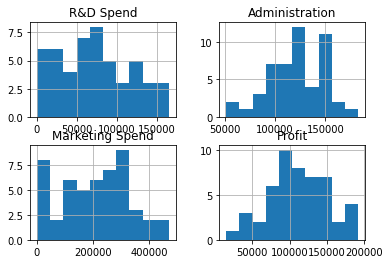

In [ ]:
import matplotlib.pyplot as plt
#mpg so dam di chuyen trong 1 galong
#disp the tich buong dot
#hp la ma luc
#wt la khoi luong
data.hist() #So lan lap lai cua data
plt.show()


In [ ]:
#Moi lien quan giua cac dai luong
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<AxesSubplot:>

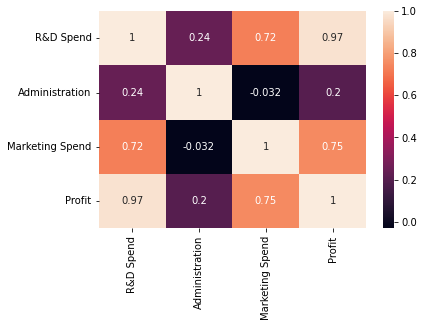

In [ ]:
import seaborn as sns
sns.heatmap(correlation, annot = True)
#Gia tri tuyet doi cang lon, moi lien quan cang lon
#Dau tru la nghich bien, dau cong la dong bien

In [ ]:
#---------------------------------------------

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

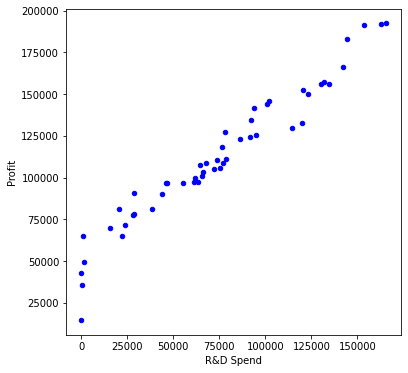

In [ ]:
data.plot(kind= 'scatter', x = 'R&D Spend', y = 'Profit', figsize = (6 , 6), color = 'blue')

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['R&D Spend']), y= data['Profit'])
print(model.intercept_)
print(model.coef_)
#y = coef*x + intercept

49032.89914125215
[0.85429137]


In [ ]:
#Do chinh xac
model.score(X = pd.DataFrame(data['R&D Spend']), y= data['Profit'])

0.9465353160804393

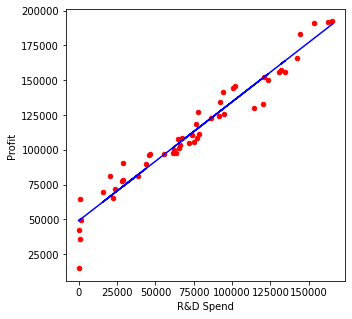

In [ ]:
data.plot(kind= 'scatter', x = 'R&D Spend', y= 'Profit', figsize = (5,5), color = 'red')
y_pred = model.predict(X = pd.DataFrame(data['R&D Spend']))
plt.plot(data['R&D Spend'], y_pred, color = 'blue')

Intercept cua mo hinh: 48128.14916956878
Coefficient cua mo hinh [ 8.90147291e-01 -2.31821806e-07]
Do chinh xac cua mo hinh 0.946703652909133


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.946703652909133


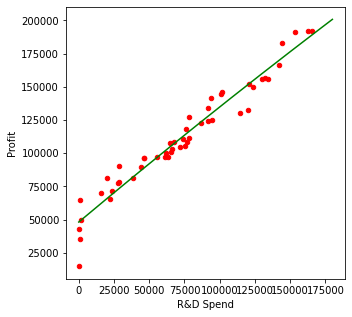

In [ ]:
#Mo hinh bac 2
model = linear_model.LinearRegression()
X = pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2]).T
model.fit(X, y= data['Profit'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Profit']))

#Ve do thi mo hinh bac 2
import numpy as np
range = np.arange(0,180000,10)
data.plot(kind= 'scatter', x = 'R&D Spend', y= 'Profit', figsize = (5,5), color = 'red')
predictor = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Profit']))



Intercept cua mo hinh: 43108.76756818297
Coefficient cua mo hinh [ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]
Do chinh xac cua mo hinh 0.9540709421464032


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.9540709421464032


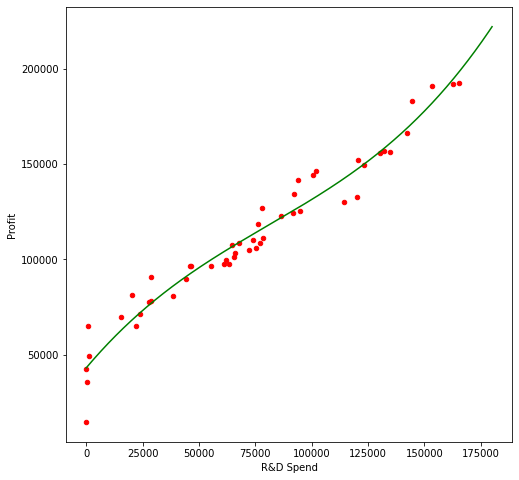

In [ ]:
#Mo hinh bac 3
model = linear_model.LinearRegression()
X = pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2, data['R&D Spend']**3]).T
model.fit(X, y= data['Profit'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Profit']))

#Ve do thi mo hinh bac 3
import numpy as np
range = np.arange(0,180000,10)
data.plot(kind= 'scatter', x = 'R&D Spend', y= 'Profit', figsize = (8,8), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Profit']))


Intercept cua mo hinh: 54454.40996740002
Coefficient cua mo hinh [ 6.45872939e-10  2.52519103e-05 -2.52720474e-10  8.00998401e-16]
Do chinh xac cua mo hinh 0.9338075472558462


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.9338075472558462


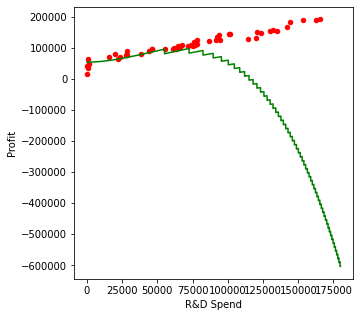

In [ ]:
#Mo hinh bac 4
model = linear_model.LinearRegression()
X = pd.DataFrame([data['R&D Spend'], data['R&D Spend']**2, data['R&D Spend']**3, data['R&D Spend']**4]).T
model.fit(X, y= data['Profit'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Profit']))
#Ve do thi mo hinh bac 4
import numpy as np
range = np.arange(0,180000,10)
data.plot(kind= 'scatter', x = 'R&D Spend', y= 'Profit', figsize = (5,5), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3, range**4]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Profit']))